In [ ]:
!pip install python-swiftclient
!pip install python-keystoneclient

In [117]:
!pip install netcdf4

    100% |████████████████████████████████| 5.3MB 252kB/s eta 0:00:01


In [3]:
!pip install cartopy

    100% |████████████████████████████████| 8.2MB 163kB/s eta 0:00:01
    100% |████████████████████████████████| 1.6MB 745kB/s eta 0:00:01
    100% |████████████████████████████████| 194kB 3.4MB/s ta 0:00:011
  Running setup.py bdist_wheel for cartopy ... done
  Stored in directory: /Users/anthonyrawlins/Library/Caches/pip/wheels/fa/92/d2/e266b797a4b47aec3c10472ee91ebc0c0d0eddc3491b523ddb
  Running setup.py bdist_wheel for pyshp ... done
  Stored in directory: /Users/anthonyrawlins/Library/Caches/pip/wheels/c1/bf/48/4209516889f62a89118947e7e48e5033d72d300cf1f73a11ca
Successfully built cartopy pyshp


In [1]:
import xarray as xr
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.animation as animation
import cartopy.crs as ccrs

def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step

xs = list(frange(10., 45., 0.5))
ys = list(frange(112., 155., 0.5))

times = list(pd.date_range('2017-01-01', periods=365))

# data = np.geomspace(-1+0j, 1+0j, num=365*len(xs)*len(ys)).reshape(365,len(xs),len(ys)).astype(np.float64)
data = np.random.rand(365, len(xs), len(ys))

# print(xs)
# print(ys)

with xr.DataArray(data, coords=[times, xs, ys], dims=['time','x','y']) as da:
    da.name="LFMC"
    da.to_netcdf("test.nc")
#     print(da.sel(x=slice(10,12), y=slice(112.5, 113.5),time=slice('2017-01-02','2017-01-02')).values[0])
    da.close()
    


ImportError: dlopen(/anaconda3/lib/python3.6/site-packages/matplotlib/ft2font.cpython-36m-darwin.so, 2): Library not loaded: @rpath/libpng16.16.dylib
  Referenced from: /anaconda3/lib/libfreetype.6.dylib
  Reason: Incompatible library version: libfreetype.6.dylib requires version 51.0.0 or later, but libpng16.16.dylib provides version 49.0.0

In [3]:
from swiftclient import client

url = 'https://keystone.rc.nectar.org.au:5000/v3/'
username = 'anthony.rawlins@unimelb.edu.au'
password = 'MDI3NjkwMzcwMjZjYmQz'
project_name = 'LFMC'

# swift.get_object(container_name, object_name)

In [4]:
swift = client.Connection(authurl=url, user=username, key=password, tenant_name=project_name, auth_version='3')
container_name="MODIS"

resp_headers, containers = swift.get_account()
print("Response headers: %s" % resp_headers)
for container in containers:
    print(container)
    


Response headers: {'content-length': '101', 'x-account-container-count': '2', 'x-account-object-count': '21155', 'x-account-storage-policy-policy-0-bytes-used': '1395060072707', 'x-account-storage-policy-policy-0-container-count': '2', 'x-timestamp': '1501984895.57679', 'x-account-storage-policy-policy-0-object-count': '21155', 'x-account-bytes-used': '1395060072707', 'x-account-meta-quota-bytes': '6442450944000', 'content-type': 'application/json; charset=utf-8', 'accept-ranges': 'bytes', 'x-account-project-domain-id': '_unknown', 'x-trans-id': 'tx421eadd0d4934a54915db-005a8e6511', 'date': 'Thu, 22 Feb 2018 06:37:05 GMT'}
{'count': 21155, 'bytes': 1395060072707, 'name': 'MODIS'}
{'count': 0, 'bytes': 0, 'name': 'lfmc'}


In [5]:
headers, response = swift.get_container('MODIS')
response

[{'bytes': 69386632,
  'content_type': 'application/binary',
  'hash': '3ddd331ae1064a94e5f2967fe3c6d083',
  'last_modified': '2018-02-19T00:27:13.506200',
  'name': 'MOD09A1.A2007361.h27v11.006.2015169064239.hdf'},
 {'bytes': 69386632,
  'content_type': 'application/binary',
  'hash': '3ddd331ae1064a94e5f2967fe3c6d083',
  'last_modified': '2018-02-19T00:28:08.411210',
  'name': 'MOD09A1.A2007361.h27v11.006.2015169064239.hdf.xml'},
 {'bytes': 61704004,
  'content_type': 'application/binary',
  'hash': '311658c5a7dbd787dbfe23e40addd589',
  'last_modified': '2018-02-19T00:20:05.192920',
  'name': 'MOD09A1.A2007361.h27v12.006.2015169070106.hdf'},
 {'bytes': 61704004,
  'content_type': 'application/binary',
  'hash': '311658c5a7dbd787dbfe23e40addd589',
  'last_modified': '2018-02-19T00:20:20.387210',
  'name': 'MOD09A1.A2007361.h27v12.006.2015169070106.hdf.xml'},
 {'bytes': 73594091,
  'content_type': 'application/binary',
  'hash': '5c02e8d9003d92dbf7b9b09c6a99e50e',
  'last_modified': '2

In [6]:
import hashlib

md5 = hashlib.md5()

In [7]:
# import os
# # dummy = [['MOD09.A2008001.h17v10.20080304.hdf']]

# dummy = {}
# for elem in response[:3]:
    
#     key = elem['name']
#     if key.lower().endswith('.hdf'):

#         # Download to local
#         headers, contents = swift.get_object('MODIS', elem['name'])

#         with open(elem['name'], 'w+b') as local:
#             print("Saving %s" % elem['name'])
#             local.write(contents)
#             print("Saved %d of %d bytes" % (os.stat(elem['name']).st_size, elem['bytes']))
#         #                 if  == :
#         #                     dummy.setdefault(key, []).append(elem['name'])
    
# #         print('Downloading Granule from Nectar using Swift API failed.')
        

In [8]:
import datetime
from itertools import groupby

def used_granules():
    """ Generates a list of granules that are used to generate a MODIS composite covering Australia"""
    acceptable = []
    for h in range(27,31):
        for v in range(10, 13):
            acceptable.append((h,v))
    return acceptable

def is_acceptable_granule(granule):
    return hv_for_modis_granule(granule) in used_granules()
    
def hv_for_modis_granule(granule):
    """ Extracts HV grid coords from naming conventions of HDF-EOS file"""
    parts = granule.split('.')
    hv_component = parts[2].split('v')
    h = int(hv_component[0].replace('h', ''))
    v = int(hv_component[1])
    return (h, v)

def date_for_modis_granule(granule) -> datetime.datetime:
    """ Extracts the observation date from the naming conventions of a HDF-EOS file"""
    # unravel naming conventions
    parts = granule.split('.')
    
    # set the key for subgrouping to be the date of observation by parsing the Julian Date
    return datetime.datetime.strptime((parts[1].replace('A', '')), '%Y%j')

# Image bank for time slices
ims = []

# New dictionary to hold our subgroups
grouped = {}

# Group the granules into batches based on their observation date
for elem in response:
    if elem['name'].lower().endswith('.hdf'):
        key = date_for_modis_granule(elem['name']).strftime('%Y-%m-%d')
        grouped.setdefault(key, []).append(elem)



In [9]:
# list(grouped.values())

list(grouped)

['2007-12-27',
 '2008-01-01',
 '2008-01-09',
 '2008-01-17',
 '2008-01-25',
 '2008-02-02',
 '2008-02-10',
 '2008-02-18',
 '2008-02-26',
 '2008-03-05',
 '2008-03-13',
 '2008-03-21',
 '2008-03-29',
 '2008-04-06',
 '2008-04-14',
 '2008-04-22',
 '2008-04-30',
 '2008-05-08',
 '2008-05-16',
 '2008-05-24',
 '2008-06-01',
 '2008-06-09',
 '2008-06-17',
 '2008-06-25',
 '2008-07-03',
 '2008-07-11',
 '2008-07-19',
 '2008-07-27',
 '2008-08-04',
 '2008-08-12',
 '2008-08-20',
 '2008-08-28',
 '2008-09-05',
 '2008-09-13',
 '2008-09-21',
 '2008-09-29',
 '2008-10-07',
 '2008-10-15',
 '2008-10-23',
 '2008-10-31',
 '2008-11-08',
 '2008-11-16',
 '2008-11-24',
 '2008-12-02',
 '2008-12-10',
 '2008-12-18',
 '2008-12-26',
 '2009-01-01',
 '2009-01-09',
 '2009-01-17',
 '2009-01-25',
 '2009-02-02',
 '2009-02-10',
 '2009-02-18',
 '2009-02-26',
 '2009-03-06',
 '2009-03-14',
 '2009-03-22',
 '2009-03-30',
 '2009-04-07',
 '2009-04-15',
 '2009-04-23',
 '2009-05-01',
 '2009-05-09',
 '2009-05-17',
 '2009-05-25',
 '2009-06-

In [10]:
def get_hit_list():
    g = np.array([
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0]
        ])
    return g

In [11]:
def save_modis_to_temp(granule):
    # Download to local
    headers, contents = swift.get_object('MODIS', granule)

    with open(granule, 'w+b') as local:
        print("Saving %s" % granule)
        local.write(contents)
#                     print("Saved %d of %d bytes" % (os.stat(granule).st_size, granule['bytes']))
        local.close()

In [46]:
# for each date of observation
for key in list(grouped):
    hits = get_hit_list()
    
    composite_width = 7*2400
    composite_height = 6*2400

    composite_shape = (composite_width, composite_height)
    composite = np.zeros(composite_shape)
    
    print("prior to merging composite view: ")
    print(gf)
    for elem in grouped[key]:        
        h,v = hv_for_modis_granule(elem['name'])
        hits[h-27,v-9] += 1

        if is_acceptable_granule(granule):
            if granule.lower().endswith('.hdf'):
                obs_time = date_for_modis_granule(granule)
                save_modis_to_temp(granule)

                run(granule)

                # insert the granule at the correct coordinate offsets
                for i in range(2400):
                    for j in range(2400):
                        x = int((h-27) * 2400) + i
                        y = int((v-10) * 2400) + j
                        composite[x, y] = gf['sur'][i,j]
        print("After merging composite view:")
        print(gf)
        
    print(hits)

[[0 0 1 1 0 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 0 0 0]
 [1 1 0 0 0 0]]
[[0 0 1 1 0 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 0 0 0]
 [1 1 0 0 0 0]]
[[0 0 1 1 0 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 0 0 0]
 [1 1 0 0 0 0]]
[[0 0 1 1 0 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 0 0 0]
 [1 1 0 0 0 0]]
[[0 0 1 1 0 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 0 0 0]
 [1 1 0 0 0 0]]
[[0 0 1 1 0 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 0 0 0]
 [1 1 0 0 0 0]]
[[0 0 1 1 0 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 0 0 0]
 [1 1 0 0 0 0]]
[[0 0 1 1 0 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 0 0 0]
 [1 1 0 0 0 0]]
[[0 0 1 1 0 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]
 [1 1 1 0 0 0]
 [1 1 0 0 0 0]]
[[0 0 1 1 0 0]
 [1 1 1 1 1 0]
 [1 1 1 1 1 0]
 

In [12]:
def convert_modis_granule_file_to_lfmc(fobj):
    b1 = run(fobj['name'], 'sur_refl_b01')
    b3 = run(fobj['name'], 'sur_refl_b03')
    b4 = run(fobj['name'], 'sur_refl_b04')
    vari = ((b4 - b1) / (b4 + b1 - b3 )).clip(-1,1)

    # Calc spectral index
    vari_max = vari.max()
    vari_min = vari.min()
    vari_range = vari_max - vari_min
    rvari = ((vari - vari_min / vari_range)).clip(0, 1)  # SI
    data = np.reshape(np.array(52.51 **(1.36*rvari)), (2400,2400)).astype(np.float64)

    xrd = xr.DataArray(data, coords=b1.coords, dims=b1.dims)
    xrd.name = 'lfmc'
    xrd = xrd.to_dataset().expand_dims('time')
    xrd.coords['time'] = [datetime.datetime(captured.year, captured.month, captured.day)]
    xrd.attrs['created'] = "%s" % (datetime.datetime.now().strftime("%d-%m-%Y"))
    xrd.attrs['crs'] = '+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs '
    xrd.attrs['time:units'] = 'days since %s' % (captured.strftime("%Y-%m-%d"))
    xrd.load()
#           xrd.to_netcdf(fobj['name']+'_lfmc.nc')

    lons = np.array(xrd.variables['longitude'][:])
    lats = np.array(xrd.variables['latitude'][:])

    # print("Length of all longs is: %d" % len(lons))

    fm = np.array(xrd['lfmc'].data)
    return fm

In [14]:
import os
import re
import osgeo.gdal as gdal

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# import mpl_toolkits.basemap.pyproj as pyproj
import pyproj
import numpy as np

USE_GDAL = False

def read_hdfeos_df_as_xarray(FILE_NAME, DATAFIELD_NAME):

    GRID_NAME = 'MOD_Grid_500m_Surface_Reflectance'
    gname = 'HDF4_EOS:EOS_GRID:"{0}":{1}:{2}'.format(FILE_NAME,
                                                     GRID_NAME,
                                                     DATAFIELD_NAME)
    gdset = gdal.Open(gname)
    data = gdset.ReadAsArray().astype(np.float64)

    # Construct the grid.
    x0, xinc, _, y0, _, yinc = gdset.GetGeoTransform()
    nx, ny = (gdset.RasterXSize, gdset.RasterYSize)
    x = np.linspace(x0, x0 + xinc*nx, nx)
    y = np.linspace(y0, y0 + yinc*ny, ny)
    xv, yv = np.meshgrid(x, y)

    # In basemap, the sinusoidal projection is global, so we won't use it.
    # Instead we'll convert the grid back to lat/lons.
    sinu = pyproj.Proj("+proj=sinu +R=6371007.181 +nadgrids=@null +wktext")
    wgs84 = pyproj.Proj("+init=EPSG:4326") 
    lon, lat= pyproj.transform(sinu, wgs84, xv, yv)

    # Read the attributes.
    meta = gdset.GetMetadata()
    long_name = meta['long_name']        
    units = meta['units']
    _FillValue = np.float64(meta['_FillValue'])
    scale_factor = np.float64(meta['scale_factor'])
    valid_range = [np.float64(x) for x in meta['valid_range'].split(', ')] 

    del gdset
   
    invalid = np.logical_or(data > valid_range[1],
                            data < valid_range[0])
    invalid = np.logical_or(invalid, data == _FillValue)
    data[invalid] = np.nan
    data = data / scale_factor
       
    # TODO - Reinstate data masking!
    # data = np.ma.masked_array(data, np.isnan(data))

    df = pd.DataFrame(data, index=lat, columns=lon)
    xrd = xr.DataArray(df)
    xrd.name=DATAFIELD_NAME
    xrd = xrd.rename({'dim_0':'latitude'})
    xrd = xrd.rename({'dim_1':'longitude'})
    
    return xrd




ImportError: dlopen(/anaconda3/lib/python3.6/site-packages/osgeo/_gdal.cpython-36m-darwin.so, 2): Library not loaded: @rpath/libgssapi_krb5.2.2.dylib
  Referenced from: /anaconda3/lib/libgdal.20.dylib
  Reason: image not found

In [22]:
plt.ylabel('lat')
plt.xlabel('lon')

# for each date of observation
for k in list(grouped):
#     print(grouped[k])

    composite_width = 7*2400
    composite_height = 6*2400

    composite_shape = (composite_width, composite_height)
    composite = np.zeros(composite_shape)

    print(composite.shape)

    for granule in grouped[k]:
        
        print(granule['name'])
        
        

        # 'group' could contain 1 to many granules

        # reconstruct a single dataset from the collection of granules
        # parse the hv values to find the granules position in the larger map
        # For example:

        #      27   28   29   30   31   <-- H values
        #   9   .    .    .    .    .
        #  10   .    .    .    .    .
        #  11   .    .    .    .    .
        #  12   .    .    .    .    .
        #  13   .    .    .    .    .
        #   ^
        #   |
        #   V values
        print(granule['name'])

        if is_acceptable_granule(granule['name']):
            if granule['name'].lower().endswith('.hdf'):

                obs_time = date_for_modis_granule(granule['name'])

                # Download to local
                headers, contents = swift.get_object('MODIS', granule['name'])

                with open(granule['name'], 'w+b') as local:
                    print("Saving %s" % granule)
                    local.write(contents)
#                     print("Saved %d of %d bytes" % (os.stat(granule).st_size, granule['bytes']))
                    local.close()

                h,v = hv_for_modis_granule(granule['name'])

                with convert_modis_granule_file_to_lfmc(granule['name']) as lfmc:
                    # insert the granule at the correct coordinate offsets
                    for i in range(2400):
                        for j in range(2400):
                            x = int((h-27) * 2400) + i
                            y = int((v-10) * 2400) + j
                            composite[x, y] = lfmc['LFMC'][i,j]

    # All granules are plotted into the composite, but data might have been overwritten according to sort order
    with xr.DataArray(composite) as comp_xr:
        comp_xr['time'] = obs_time
        comp_xr.name = 'LFMC'
        comp_xr.attrs['LFMC:long_name'] = 'Landscape Fuel Moisture Condition for %s' % (date_for_modis_granule(granule))
        comp_xr.attrs['crs'] = '+proj=latlong'
        comp_xr.attrs['created'] = datetime.datetime.now().strftime('%Y-%m%dT00:00:00.000Z')
        comp_xr.attrs['units'] = "Wet weight over dry weight."
        comp_xr.attrs['_nullValue'] = np.nan
        comp_xr.attrs['_fillValue'] = 0
        comp_xr.attrs['time:units'] = 'days since %s' % (da)

        # Debugging
        # print(comp_xr)

        try:
            comp_xr.to_netcdf('lfmc_%s.nc' % obs_time.strftime('%Y-%m-%d'))                 
        except:
            print('Writing XArray as Net_CDF4 failed.')
#         plt.title('%s' % obs_time.strftime('%d/%m/%Y'))
        im = plt.imshow(comp_xr['LFMC'], animated=True)        
        ims.append(im)

im_ani = animation.ArtistAnimation(fig1, ims, interval=50, repeat_delay=3000, blit=False)
im_ani.save("LFMC_Decade_Complete.mp4")



(16800, 14400)
MOD09A1.A2007361.h27v11.006.2015169064239.hdf
MOD09A1.A2007361.h27v11.006.2015169064239.hdf
Saving {'hash': '3ddd331ae1064a94e5f2967fe3c6d083', 'last_modified': '2018-02-19T00:27:13.506200', 'bytes': 69386632, 'name': 'MOD09A1.A2007361.h27v11.006.2015169064239.hdf', 'content_type': 'application/binary'}


NameError: name 'convert_modis_granule_file_to_lfmc' is not defined

365


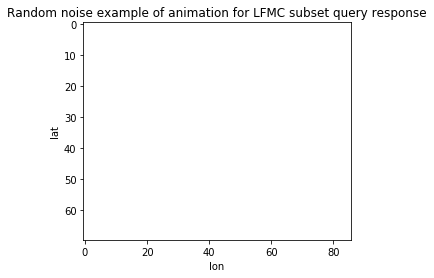

In [2]:
%matplotlib inline

fig1 = plt.figure()
plt.axes(projection=ccrs.Sinusoidal.MODIS)
plt.title('Composite Reprojection of MODIS Granules')

ims = []

with xr.open_dataset("test.nc") as ds:
    
    # Perform subsetting - ie spatiotemporal brushing
    
    for i in range(0,ds.dims['time']):
        df = ds.isel(time=i)
        im = plt.imshow(df.LFMC, animated=True)
        ims.append([im])
        
    im_ani = animation.ArtistAnimation(fig1, ims, interval=50, repeat_delay=3000, blit=False)
    im_ani.save("test.mp4")
    plt.show()